<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

**Name** : Kant Charoensedtasin (Gun)

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

One of tutor school is planning to open new school after the covid-19 pandemic. Tutor school hires data scientist for analyze the ACT/SAT data. Since this is the first phase of the project, tutor school require data about SAT/ACT as much as possible. The purpose of the analysis is acquiring the information about SAT/ACT in 2017 - 2019 and student.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

This project selects 6 dataset e.g. act_2017, act_2018, act_2019, sat_2017, sat_2018 and sat_2019. All of this dataset is the participation and average score for each state in america. 

### Outside Research

There are some of state in US that require ACT or SAT
- https://blog.prepscholar.com/act-vs-sat
- https://www.petersons.com/blog/states-requiring-the-act/

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean_m(data):
    """ Find mean of the list
        Parameter
        ---------
        data : data is receive in list
    """
    value = 0
    for i in range(len(data)):
        value += data[i]
    return value/len(data)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
def std_m(data):
    mean = mean_m(data)
    sum_diff_sqr = 0
    for i in range(len(data)):
        sum_diff_sqr += (data[i] - mean)**2
    return (sum_diff_sqr/len(data))**(0.5)

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
def data_clean(data):
    return float(data.replace("%",""))/100

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.rcParams.update({'font.size': 10})
sns.set_palette('Pastel1')

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [5]:
# Import data in to dataframe
act_2017 = pd.read_csv('../data/act_2017.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

In [6]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [7]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [8]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [9]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [10]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [11]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [12]:
act_2017.info() # Has 1 additional : national rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [13]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [14]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [15]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [17]:
sat_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [18]:
# Clean act_2017 data with data_clean function to change 10% format to 0.1
act_2017['Participation'] = act_2017['Participation'].map(data_clean)
# Change data type from object to float
act_2017['Composite'] = act_2017['Composite'].str.replace('x',"") # Value in this column is 20.2x --> Need to remove x
act_2017['Composite'] = act_2017['Composite'].astype(float)
act_2017['Science'][21] = 23 # The value in science column is 2.3 but average = 23 --> change to 23
# Rename column to lowercase
act_2017.rename(str.lower,axis = 'columns',inplace = True)

C:\Users\Kant\AppData\Local\Temp\ipykernel_212\2845651155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_2017['Science'][21] = 23 # The value in science column is 2.3 but average = 23 --> change to 23


In [19]:
# Clean sat_2017 data with data_clean function to change 10% format to 0.1
sat_2017['Participation'] = sat_2017['Participation'].map(data_clean)
# Change value in row : index 20 and column math 52 --> 524 (calculate from total score - Evi. score)  
sat_2017['Math'][20] = 524
# Rename column to lowercase and eliminate space and - to underscore
sat_2017.rename(str.lower,axis = 'columns',inplace = True)
sat_2017.rename(columns = {'evidence-based reading and writing' :'ebrw'},inplace = True)

C:\Users\Kant\AppData\Local\Temp\ipykernel_212\4000877526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_2017['Math'][20] = 524


In [20]:
act_2018['Participation'] = act_2018['Participation'].map(data_clean)
act_2018.drop_duplicates(inplace = True) # state marine has duplicate
act_2018.rename(str.lower,axis = 'columns',inplace = True)
act_2018['state'] = act_2018['state'].replace('District of columbia','District of Columbia') # Capital c in comlumbia

In [21]:
sat_2018['Participation'] = sat_2018['Participation'].map(data_clean)
sat_2018.rename(str.lower,axis = 'columns',inplace = True)
sat_2018.rename(columns = {'evidence-based reading and writing' :'ebrw'},inplace = True)

In [22]:
# act_2019 has additional nation row
act_2019['Participation'] = act_2019['Participation'].map(data_clean)
act_2019.rename(str.lower,axis = 'columns',inplace = True)

In [23]:
# Virgin Islands, Puerto Rico is extra in sat_2019
sat_2019.rename(columns = {'Participation Rate' :'Participation'},inplace = True)
sat_2019['Participation'].replace("—",'0.43',inplace = True) # Change - to 1.5 (mean 2017,2018 = 0.4 , 0.46)
sat_2019['Participation'] = sat_2019['Participation'].map(data_clean)
sat_2019.rename(str.lower,axis = 'columns',inplace = True)

In [24]:
sat_2019[sat_2019['state'] == 'Puerto Rico']

,state,participation,ebrw,math,total
39,Puerto Rico,0.0043,483,462,944


In [25]:
sat_2019[sat_2019['state'] == 'Virgin Islands']

,state,participation,ebrw,math,total
47,Virgin Islands,0.0043,490,445,935


In [26]:
sat_2019.drop([39,47],inplace = True)

In [27]:
data = [act_2017,sat_2017,act_2018,sat_2018,act_2019,sat_2019]
title = ['act_2017','sat_2017','act_2018','sat_2018','act_2019','sat_2019']
for index, data_ in enumerate(data):
    print(f'''nunique for state in {title[index]} dataset : {data_['state'].nunique()}''')

nunique for state in act_2017 dataset : 52
nunique for state in sat_2017 dataset : 51
nunique for state in act_2018 dataset : 51
nunique for state in sat_2018 dataset : 51
nunique for state in act_2019 dataset : 52
nunique for state in sat_2019 dataset : 51


In [28]:
act_sat_2019 = act_2019.merge(right =  sat_2019,on = 'state',suffixes = ("_act","_sat"))

In [29]:
# Merge sat_2017 and act_2017 with state column
act_sat_2017 = act_2017.merge(right =  sat_2017,on = 'state',suffixes = ("_act","_sat"))
# Create % score for sat and act with
# Full score : sat = 1600, act = 36
act_sat_2017['percent_act_total'] = round(act_sat_2017['composite']/36*100,2)
act_sat_2017['percent_sat_total'] = round(act_sat_2017['total']/1600*100,2)

In [30]:
# Merge sat_2017 and act_2018 with state column
act_sat_2018 = act_2018.merge(right =  sat_2018,on = 'state',suffixes = ("_act","_sat"))
act_sat_2018['percent_act_total'] = round(act_sat_2018['composite']/36*100,2)
act_sat_2018['percent_sat_total'] = round(act_sat_2018['total']/1600*100,2)

In [31]:
# Merge sat_2017 and act_2019 with state column
act_sat_2019 = act_2019.merge(right =  sat_2019,on = 'state',suffixes = ("_act","_sat"))
act_sat_2019['percent_act_total'] = round(act_sat_2019['composite']/36*100,2)
act_sat_2019['percent_sat_total'] = round(act_sat_2019['total']/1600*100,2)

In [32]:
print(f'act_sat_2017 has {act_sat_2017.shape[0]} rows.') # Has 1 row lower than act_2017 (act_2017 has 1 national row)
print(f'act_sat_2018 has {act_sat_2018.shape[0]} rows.')
print(f'act_sat_2019 has {act_sat_2019.shape[0]} rows.')

act_sat_2017 has 51 rows.
act_sat_2018 has 51 rows.
act_sat_2019 has 51 rows.


### Data Dictionary
The 6 datasets using in this project are ACT2017, ACT2018, ACT2019, SAT2017, SAT2018 and SAT2019. All of the features in the dataset display in table below.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT2017/ACT2018/ACT2019/SAT2017/SAT2018/SAT2019|Identify the state.|
|participation|float|ACT2017/ACT2018/ACT2019/SAT2017/SAT2018/SAT2019|The fraction of participation to the SAT/ACT test.|
|english|float|ACT2017|Average score of English subject for each state.|
|math|float/int|ACT2017/SAT2017/SAT2018/SAT2019|Average score of Math subject for each state.|
|reading|float|ACT2017|Average score of reading part for each state.|
|science|float|ACT2017|Average score of Science subject for each state.|
|composite|float|ACT2017/ACT2018/ACT2019|Average score of all parts for each state.|
|ebrw|int|ACT2017/SAT2017/SAT2018/SAT2019|Average score of evidence-based reading and writing part for each state.|
|total|int|ACT2017/SAT2017/SAT2018/SAT2019|Average total SAT score for each state.|

## Exploratory Data Analysis

In exploratory data analysis section, there are 4 parts of analysis with difference scenario.
1. [High participation rate of ACT and SAT in US](#1.-High-participation-rate-of-ACT-and-SAT-i-US)
2. [Compare score between high participation rate and the other state](#2.-Compare-score-between-high-participation-rate-state-and-the-other-state)
3. [High participation rate for both ACT and SAT](#3.-High-participation-rate-for-both-ACT-and-SAT)
4. [Relation between score for each subject in ACT/SAT](#4.-Relation-between-score-for-each-subject-in-ACT/SAT)

Part 1, 3 : Analysis the state in US for locate the tutor school (state with 100% participation rate).

Part 2 : Analysis the performance of student.

Part 4 : Analysis the correlation between each subject in ACT and SAT.

### 1. High participation rate of ACT and SAT in US
In This part, I will focus on the state that have high participation rate for both ACT and SAT.

In [33]:
# Explore summary of ACT/SAT 2017 data
act_sat_2017.describe().round(2)

,participation_act,english,math_act,reading,science,composite,participation_sat,ebrw,math_sat,total,percent_act_total,percent_sat_total
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,0.65,20.93,21.18,22.01,21.45,21.52,0.40,569.12,556.88,1126.10,59.78,70.38
std,0.32,2.35,1.98,2.07,1.74,2.02,0.35,45.67,47.12,92.49,5.61,5.78
min,0.08,16.30,18.00,18.10,18.20,17.80,0.02,482.00,468.00,950.00,49.44,59.38
25%,0.31,19.00,19.40,20.45,19.95,19.80,0.04,533.50,523.50,1055.50,55.00,65.97
50%,0.69,20.70,20.90,21.80,21.30,21.40,0.38,559.00,548.00,1107.00,59.44,69.19
75%,1.00,23.30,23.10,24.15,23.10,23.60,0.66,613.00,599.00,1212.00,65.56,75.75
max,1.00,25.50,25.30,26.00,24.90,25.50,1.00,644.00,651.00,1295.00,70.83,80.94


The distribution of the total score for ACT 2017 and SAT 2017 is normal distribution because mean equal to median.

In [34]:
def hist_participate(df1,df2,df3,title,x,r,color=None):
    test1 = sns.histplot(data = df1, x = x,ax = ax[r][0],color = color)
    test1.set(xlim=(0,1),ylim =(0,25),title = f'Participation of {title} 2017')
    test2 = sns.histplot(data = df2, x = x,ax = ax[r][1],color = color)
    test2.set(xlim=(0,1),ylim =(0,25),title = f'Participation of {title} 2018')
    test3 = sns.histplot(data = df3, x = x,ax = ax[r][2],color = color)
    test3.set(xlim=(0,1),ylim =(0,25),title = f'Participation of {title} 2019')
    if color == None :
        ax[r][0].text(0.4, 15, f'mean = {round(df1[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = 'lightcoral', boxstyle='round'))
        ax[r][1].text(0.4, 15, f'mean = {round(df2[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = 'lightcoral', boxstyle='round'))
        ax[r][2].text(0.4, 15, f'mean = {round(df3[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = 'lightcoral', boxstyle='round'))
    else :
        ax[r][0].text(0.4, 15, f'mean = {round(df1[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = color, boxstyle='round'))
        ax[r][1].text(0.4, 15, f'mean = {round(df2[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = color, boxstyle='round'))
        ax[r][2].text(0.4, 15, f'mean = {round(df3[x].mean(),2)}', color='k', 
            bbox=dict(facecolor= 'none', edgecolor = color, boxstyle='round'))

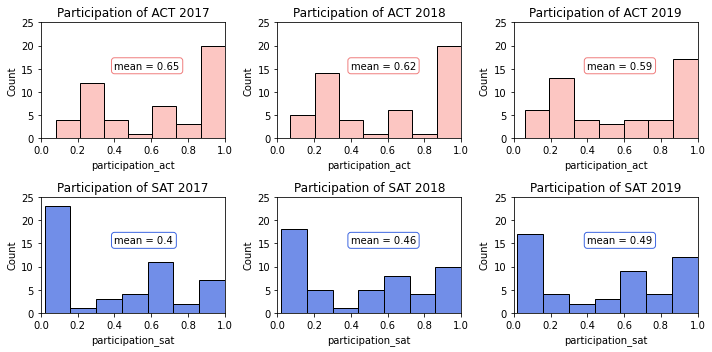

In [35]:
# Compare the participation rate
fig, ax = plt.subplots(ncols = 3,nrows = 2,figsize = (10,5))
hist_participate(act_sat_2017,act_sat_2018,act_sat_2019,'ACT','participation_act',0)
hist_participate(act_sat_2017,act_sat_2018,act_sat_2019,'SAT','participation_sat',1,'royalblue')
plt.tight_layout()

In [36]:
def heatmap_act(act_sat,ax,year,last = 0):
    act_sat_corr = act_sat[['participation_act','participation_sat','composite','total']].corr()
    mask = np.triu(np.ones_like(act_sat_corr.corr(), dtype=bool)) # Upper triangle is True
    if last == 1 :
        heatmap = sns.heatmap(act_sat_corr.corr(),annot = True,cmap= 'RdBu',mask = mask, \
                      vmin = -1, vmax = 1, linewidths=.5,annot_kws={"fontsize":14},ax = ax);
    else :
        heatmap = sns.heatmap(act_sat_corr.corr(),annot = True,cmap= 'RdBu',mask = mask, \
                      vmin = -1, vmax = 1, linewidths=.5,annot_kws={"fontsize":14},cbar = False,ax = ax);
    heatmap.set(title = f'Participation correlation {year}')

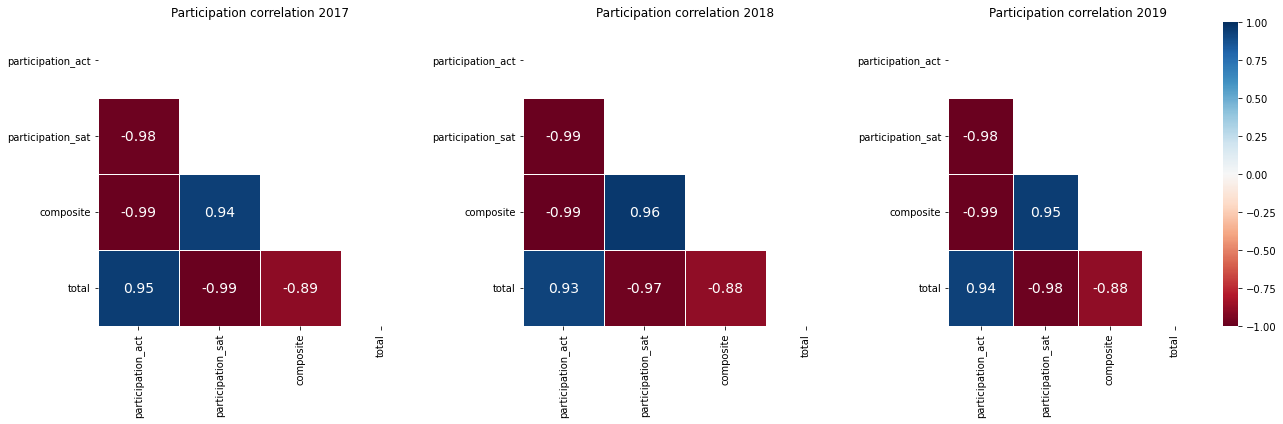

In [37]:
# Correlation of participation rate
fig1, ax1 = plt.subplots(ncols = 3,figsize = (18,6))
heatmap_act(act_sat_2017,ax1[0],2017)
heatmap_act(act_sat_2018,ax1[1],2018)
heatmap_act(act_sat_2019,ax1[2],2019,last =1)
plt.tight_layout()

From histogram and heatmap
- The students tend to choose ACT more than SAT for all 3 years and the participation rate beween ACT and SAT is almost perfect negative correlation.
- The participation rate for ACT and SAT is almost perfect negative correlation.

In [38]:
# Filter act 2017 paticipation = 1
act_sat_2017[act_sat_2017['participation_act'] == 1].describe(percentiles = [0.5])\
[['participation_act','english','math_act','reading','science','composite']].round(2)

,participation_act,english,math_act,reading,science,composite
count,17.0,17.00,17.00,17.00,17.00,17.00
mean,1.0,18.97,19.39,20.15,19.94,19.74
std,0.0,1.04,0.93,0.94,0.89,0.91
min,1.0,16.30,18.00,18.10,18.20,17.80
50%,1.0,19.40,19.30,20.10,19.90,19.80
max,1.0,20.40,21.50,21.80,21.60,21.50


In [39]:
act_sat_2019[act_sat_2019['participation_act'] == 1].describe().round(2)

,participation_act,composite,participation_sat,ebrw,math,total,percent_act_total,percent_sat_total
count,15.0,15.00,15.00,15.00,15.00,15.00,15.00,15.00
mean,1.0,19.37,0.11,594.53,585.27,1179.93,53.82,73.75
std,0.0,0.71,0.13,39.31,43.61,82.39,1.98,5.15
min,1.0,17.90,0.03,490.00,472.00,963.00,49.72,60.19
25%,1.0,18.90,0.04,581.00,559.50,1142.00,52.50,71.38
50%,1.0,19.40,0.06,610.00,596.00,1200.00,53.89,75.00
75%,1.0,19.90,0.14,621.50,613.50,1234.50,55.28,77.16
max,1.0,20.30,0.51,635.00,648.00,1283.00,56.39,80.19


#### 19 states with 100% ACT participation rate past 3 years
In this 3 years, there are 19 state that have 100% participation of ACT. This 19 states are good location for tutor school. Let's go deeper in to the student in this state. (Focus on ACT test because participation rate mean of ACT is higher than SAT)

In [40]:
state_act_100_2017 =  list(act_sat_2017[act_sat_2017['participation_act'] == 1]['state'].values)
state_act_100_2018 =  list(act_sat_2018[act_sat_2018['participation_act'] == 1]['state'].values)
state_act_100_2019 =  list(act_sat_2019[act_sat_2019['participation_act'] == 1]['state'].values)
state_act_100_3y = list(set(state_act_100_2017+state_act_100_2018+state_act_100_2019))
for i, state in enumerate(state_act_100_3y):
    print(f'{i+1}. {state} ')

1. Utah 
2. Colorado 
3. Arkansas 
4. Nebraska 
5. Mississippi 
6. Minnesota 
7. Montana 
8. Ohio 
9. South Carolina 
10. Louisiana 
11. North Carolina 
12. Kentucky 
13. Missouri 
14. Tennessee 
15. Wyoming 
16. Alabama 
17. Nevada 
18. Wisconsin 
19. Oklahoma 


### 2. Compare score between high participation rate state and the other state
In this second part, I will compare the score of the student between high participation rate and the other state for gathering student information. This infomation is useful for choose level of the tutor.

In [41]:
# Filter act 2017 paticipation != 1
act_sat_2017[act_sat_2017['participation_act'] != 1].describe(percentiles = [0.5])\
[['participation_act','english','math_act','reading','science','composite']].round(2)

,participation_act,english,math_act,reading,science,composite
count,34.00,34.00,34.00,34.00,34.00,34.00
mean,0.48,21.91,22.08,22.95,22.20,22.41
std,0.25,2.21,1.75,1.83,1.55,1.82
min,0.08,17.80,19.20,19.20,19.30,19.00
50%,0.36,21.55,21.85,22.80,22.10,22.15
max,0.98,25.50,25.30,26.00,24.90,25.50


In [42]:
def label_chart(chart,title,xlabel,ylabel,y_add = 0,decimal = 1):
    if decimal == 1:
        for p in chart.patches:
            chart.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+y_add),ha = 'center')
        chart.set(title = title,xlabel = xlabel, ylabel = ylabel)
    else :
        for p in chart.patches:
            chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+y_add),ha = 'center')
        chart.set(title = title,xlabel = xlabel, ylabel = ylabel)

In [43]:
def mean_std_act(df_merge,year):
    mean = []
    std = []
    fig2, ax2 = plt.subplots(ncols = 2,figsize = (10,5))
    mean.append(df_merge[df_merge['participation_act'] != 1]['composite'].mean())
    mean.append(df_merge[df_merge['participation_act'] == 1]['composite'].mean())
    std.append(std_m(list(df_merge[df_merge['participation_act'] != 1]['composite'])))
    std.append(std_m(list(df_merge[df_merge['participation_act'] == 1]['composite'])))
    mean_bar = sns.barplot(x = ['p != 1','p = 1'], y = [mean[0],mean[1]],ax = ax2[0],edgecolor = 'k');
    label_chart(mean_bar,f'Mean of ACT {year}','Participation','Composite',0.1)
    std_bar = sns.barplot(x = ['p != 1','p = 1'], y = [std[0],std[1]],ax = ax2[1],edgecolor = 'k');
    label_chart(std_bar,f'Std of ACT {year}','Participation',None,0.01)
    return mean, std

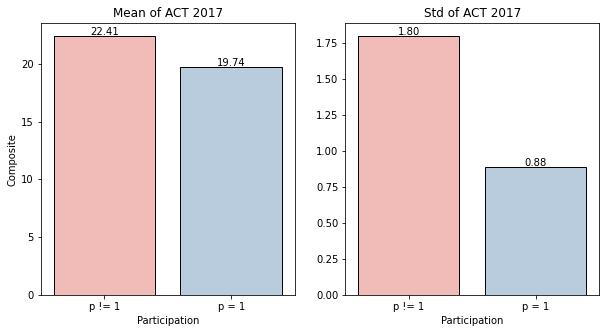

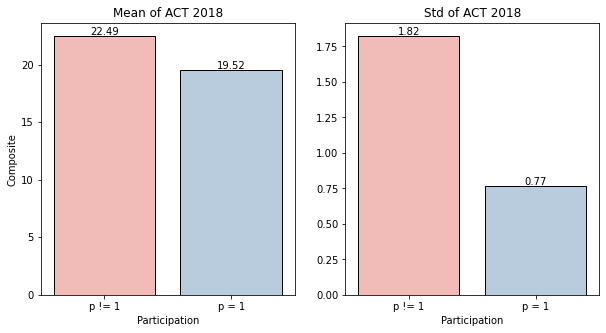

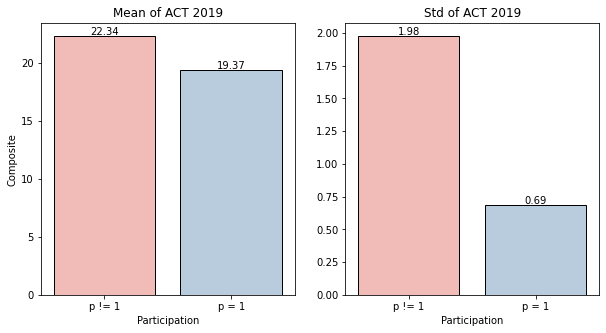

In [44]:
# Compare mean/std ACT score between state w/paricipation rate = 100% and != 100%
mean_act_2017, std_act_2017 = mean_std_act(act_sat_2017,2017);
mean_act_2018, std_act_2018 = mean_std_act(act_sat_2018,2018);
mean_act_2019, std_act_2019 = mean_std_act(act_sat_2019,2019);

Mean ACT 2017 - 2019 score of participation in the state equal to 100% (1/3 of overall) is lower than the other state that participation doesn't equal to 100%. Moreover, the states that participation equal to 100% have lower standard deviation. It mean all distribution of score is narrow and the examination can't classify good and bad student.

In [45]:
# Filter sat 2017 paticipation = 1
act_sat_2017[act_sat_2017['participation_sat'] == 1]\
[['participation_sat','ebrw','math_sat','total']].describe(percentiles = [0.5]).round(2)

,participation_sat,ebrw,math_sat,total
count,4.0,4.00,4.00,4.00
mean,1.0,506.00,491.75,998.00
std,0.0,19.75,18.12,37.44
min,1.0,482.00,468.00,950.00
50%,1.0,506.00,493.50,1000.50
max,1.0,530.00,512.00,1041.00


#### 4 states with 100% SAT participation rate past 3 years
There are only 4 state that have 100% participation of SAT. This 4 states are still good location. The analysis of the student is the same as analysis ACT in previuos.

In [46]:
# Filter sat 2017 paticipation != 1
act_sat_2017[act_sat_2017['participation_sat'] != 1]\
[['participation_sat','ebrw','math_sat','total']].describe(percentiles = [0.5]).round(2)

,participation_sat,ebrw,math_sat,total
count,47.00,47.00,47.00,47.00
mean,0.35,574.49,562.43,1137.00
std,0.32,43.19,44.63,87.52
min,0.02,513.00,493.00,1005.00
50%,0.26,561.00,551.00,1114.00
max,0.96,644.00,651.00,1295.00


In [47]:
def mean_std_sat(df_merge,year):
    mean = []
    std = []
    mean.append(df_merge[df_merge['participation_sat'] != 1]['total'].mean())
    mean.append(df_merge[df_merge['participation_sat'] == 1]['total'].mean())
    std.append(std_m(list(df_merge[df_merge['participation_sat'] != 1]['total'])))
    std.append(std_m(list(df_merge[df_merge['participation_sat'] == 1]['total'])))
    fig3, ax3 = plt.subplots(ncols = 2,figsize = (10,5))
    mean_bar = sns.barplot(x = ['p != 1','p = 1'], y = [mean[0],mean[1]],ax = ax3[0],edgecolor = 'k');
    label_chart(mean_bar,f'Mean of SAT {year}','Participation','Total',10,decimal = 0)
    std_bar = sns.barplot(x = ['p != 1','p = 1'], y = [std[0],std[1]],ax = ax3[1],edgecolor = 'k');
    label_chart(std_bar,f'Std of SAT {year}','Participation',None,1,decimal = 0)
    return mean, std

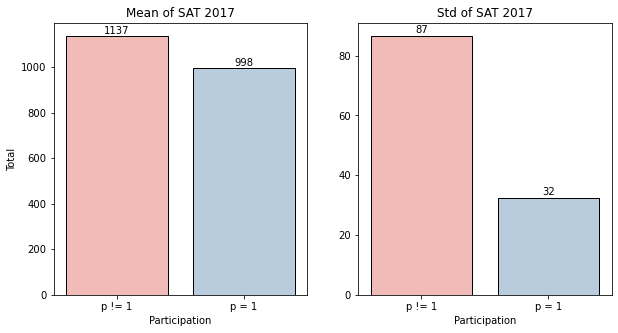

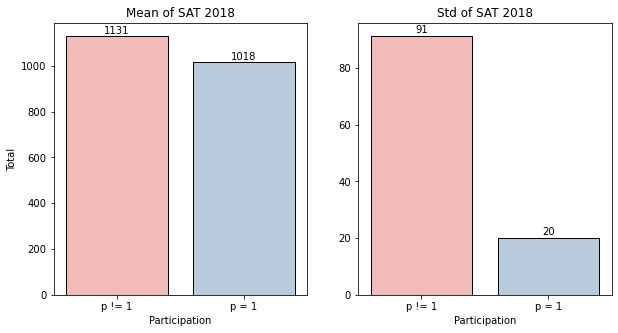

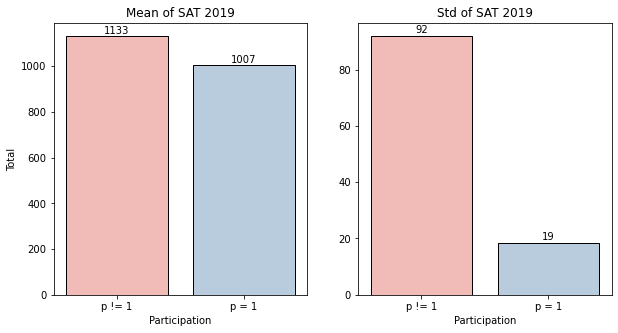

In [48]:
# Compare mean/std SAT score between state w/paricipation rate = 100% and != 100%
mean_sat_2017, std_sat_2017 = mean_std_sat(act_sat_2017,2017);
mean_sat_2018, std_sat_2018 = mean_std_sat(act_sat_2018,2018);
mean_sat_2019, std_sat_2019 = mean_std_sat(act_sat_2019,2019);

Mean SAT 2017 - 2019 score of participation in the state equal to 100% (4 states) is lower than the other state that participation didn't equal to 100%. More over, the state that participation equal to 100% had lower standard deviation. It could be the distribution of score was narrow. I think the examination couldn't classsify the student in this state. The result is the same trend as ACT.

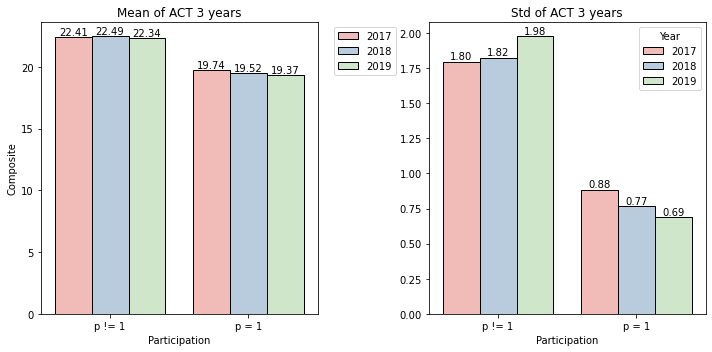

In [49]:
# Compare mean/std of ACT score (year 2017 -2019)
mean_act_3y = mean_act_2017 + mean_act_2018 + mean_act_2019
std_act_3y = std_act_2017 + std_act_2018 + std_act_2019
xtick_3y = ['p != 1'if i%2 == 0 else 'p = 1' for i in range(6)]
years = [2017,2017,2018,2018,2019,2019]
conclu_act_3y = [mean_act_3y,std_act_3y,xtick_3y,years]
conclu_act_3y_r = pd.DataFrame(conclu_act_3y).transpose().rename(columns = {0 :'Mean',1 : 'Std',2 :'Participation',3 : 'Year'})

fig4 , ax4 = plt.subplots(ncols = 2, figsize = (10, 5))
mean_act_3y_bar = sns.barplot(data = conclu_act_3y_r, x = 'Participation', y = 'Mean',hue = 'Year',ax = ax4[0],edgecolor = 'k')
ax4[0].legend(bbox_to_anchor = (1.3,1))
label_chart(mean_act_3y_bar,'Mean of ACT 3 years','Participation','Composite',0.15)

std_act_3y_bar = sns.barplot(data = conclu_act_3y_r, x = 'Participation', y = 'Std',hue = 'Year',ax = ax4[1],edgecolor = 'k')
label_chart(std_act_3y_bar,'Std of ACT 3 years','Participation',None,0.015)

plt.tight_layout()

**Comparison between 3 years of ACT**

Mean of ACT 
- Doesn't change by year 

Std of ACT : 
- For participation != 1 Increase by year : The distribution of student is wider.
- For participation = 1 Decrease by year : Student may learn how to deal with ACT test

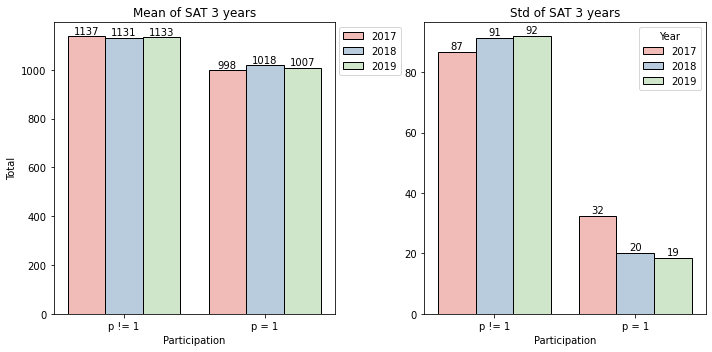

In [50]:
# Compare mean/std of SAT score (year 2017 -2019)
mean_sat_3y = mean_sat_2017 + mean_sat_2018 + mean_sat_2019
std_sat_3y = std_sat_2017 + std_sat_2018 + std_sat_2019
xtick_3y = ['p != 1'if i%2 == 0 else 'p = 1' for i in range(6)]
years = [2017,2017,2018,2018,2019,2019]
conclu_sat_3y = [mean_sat_3y,std_sat_3y,xtick_3y,years]
conclu_sat_3y_r = pd.DataFrame(conclu_sat_3y).transpose().rename(columns = {0 :'Mean',1 : 'Std',2 :'Participation',3 : 'Year'})

fig5 , ax5 = plt.subplots(ncols = 2, figsize = (10, 5))
mean_sat_3y_bar = sns.barplot(data = conclu_sat_3y_r, x = 'Participation', y = 'Mean',hue = 'Year',ax = ax5[0],edgecolor = 'k')
ax5[0].legend(bbox_to_anchor = (1.25,1))
label_chart(mean_sat_3y_bar,'Mean of SAT 3 years','Participation','Total',10,decimal = 0)

std_act_3y_bar = sns.barplot(data = conclu_sat_3y_r, x = 'Participation', y = 'Std',hue = 'Year',ax = ax5[1],edgecolor = 'k')
label_chart(std_act_3y_bar,'Std of SAT 3 years','Participation',None,1,decimal = 0)

plt.tight_layout()

**Comparison between 3 years of SAT**

Mean of SAT 
- Doesn't change by year 

Std of SAT : 
- For participation != 1 Increase by year
- For participation = 1 Decrease by year

This is exactly the same trend as ACT. From this infomation, we can conclude that ACT and SAT can classify student in US to the same group.

### 3. High participation rate for both ACT and SAT
The third part is analysis of the states that have high participation rate for both ACT and SAT. The state, have high participation rate for both ACT and SAT, is also good location for the school. This section will compare the score between this kind of state and the state from previous section.

In [51]:
# Filter both paticipation > 0.5 (2017) 
both_50_2017 = act_sat_2017[(act_sat_2017['participation_sat']>0.5) & (act_sat_2017['participation_act'] > 0.5)]\
.sort_values('participation_act',ascending = False)

In [52]:
# Filter both paticipation > 0.5 (2018) 
both_50_2018 = act_sat_2018[(act_sat_2018['participation_sat']>0.5) & (act_sat_2018['participation_act'] > 0.5)]\
.sort_values('participation_act',ascending = False)

In [53]:
# Filter both paticipation > 0.5 (2019) 
both_50_2019 = act_sat_2019[(act_sat_2019['participation_sat']>0.5) & (act_sat_2019['participation_act'] > 0.5)]\
.sort_values('participation_act',ascending = False)

#### 5 State both participation rate of ACT and SAT greater than 50%
In 2017 - 2019, there are 5 state that have both participation rate greater than 50%.

In [54]:
both50_3y = set(list(both_50_2017['state']) + list(both_50_2018['state']) + list(both_50_2019['state']))
for i, state in enumerate(list(both50_3y)):
    print(f'{i+1}. {state}')

1. North Carolina
2. Georgia
3. Florida
4. South Carolina
5. Hawaii


In [55]:
both_50_2017_T = both_50_2017.describe(percentiles = [0.5])[['participation_act','participation_sat','composite','total']].round(2).transpose()[['mean','std']]
both_50_2018_T = both_50_2018.describe(percentiles = [0.5])[['participation_act','participation_sat','composite','total']].round(2).transpose()[['mean','std']]
both_50_2019_T = both_50_2019.describe(percentiles = [0.5])[['participation_act','participation_sat','composite','total']].round(2).transpose()[['mean','std']]

In [56]:
def mean_std_act_2(df_merge,year,both50):
    mean = []
    std = []
    mean.append(df_merge[df_merge['participation_act'] != 1]['composite'].mean())
    mean.append(df_merge[df_merge['participation_act'] == 1]['composite'].mean())
    std.append(std_m(list(df_merge[df_merge['participation_act'] != 1]['composite'])))
    std.append(std_m(list(df_merge[df_merge['participation_act'] == 1]['composite'])))
    fig1, ax1 = plt.subplots(ncols = 2, figsize = (10,5))
    mean_bar = sns.barplot(x = ['p != 1','p = 1'], y = [mean[0],mean[1]],ax = ax1[0],edgecolor = 'k');
    ax1[0].hlines(y = both50['mean']['composite'],xmin = -0.75,xmax = 1.75,color = 'g',linestyles = 'dashed')
    ax1[0].text(-0.2, both50['mean']['composite']+1,'Both > 0.5 mean = {:.2f}'.format(both50['mean']['composite']),\
                color = 'k',bbox=dict(facecolor='palegreen', edgecolor='k', pad=5))
    ax1[0].set(ylim = (15,25))
    label_chart(mean_bar,f'Mean of ACT {year}','Participation','Composite',0.1)
    std_bar = sns.barplot(x = ['p != 1','p = 1'], y = [std[0],std[1]],ax = ax1[1],edgecolor = 'k');
    ax1[1].hlines(y = both50['std']['composite'],xmin = -0.75,xmax = 1.75,\
                  color = 'g',label = both50['std']['composite'],linestyles = 'dashed')
    ax1[1].text(-0.2, both50['std']['composite']+0.22,'Both > 0.5 ACT = {:.2f}'.format(both50['std']['composite']),\
                color = 'k',bbox=dict(facecolor='palegreen', edgecolor='k', pad=5))
    label_chart(std_bar,f'Std of ACT {year}','Participation',None,0.01)
    return

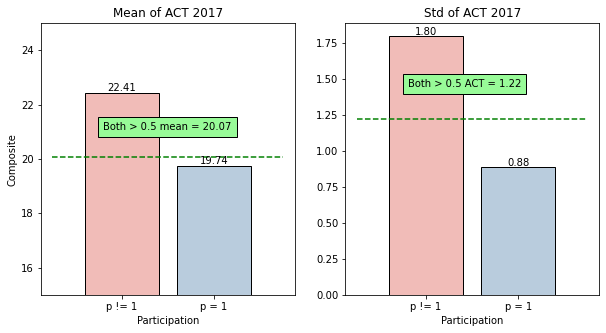

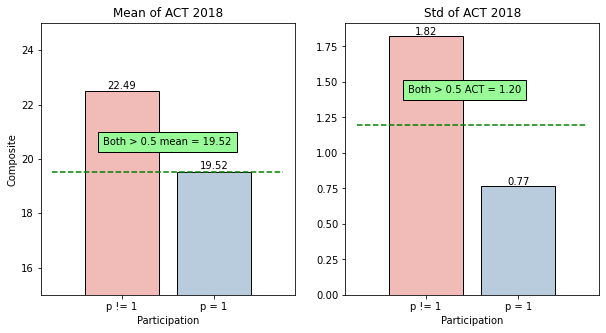

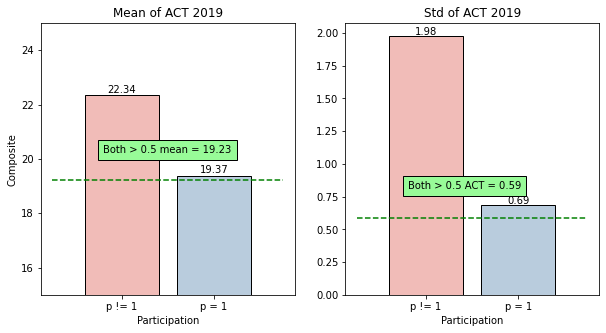

In [57]:
# Mean/std ACT score of the state that both participation > 50%
mean_std_act_2(act_sat_2017,2017,both_50_2017_T);
mean_std_act_2(act_sat_2018,2018,both_50_2018_T);
mean_std_act_2(act_sat_2019,2019,both_50_2019_T);

The student, have both participate rate of ACT and SAT greater than 50%, is nearly the student in the state that have ACT participation rate equal to 100%.

In [58]:
def mean_std_sat_2(df_merge,year,both50):
    mean = []
    std = []
    mean.append(df_merge[df_merge['participation_sat'] != 1]['total'].mean())
    mean.append(df_merge[df_merge['participation_sat'] == 1]['total'].mean())
    std.append(std_m(list(df_merge[df_merge['participation_sat'] != 1]['total'])))
    std.append(std_m(list(df_merge[df_merge['participation_sat'] == 1]['total'])))
    fig1, ax1 = plt.subplots(ncols = 2, figsize = (10,5))
    mean_bar = sns.barplot(x = ['p != 1','p = 1'], y = [mean[0],mean[1]],ax = ax1[0],edgecolor = 'k');
    ax1[0].hlines(y = both50['mean']['total'],xmin = -0.75,xmax = 1.75,color = 'g',label = both50['mean']['total'],linestyles = 'dashed')
    ax1[0].text(-0.2, both50['mean']['total']+20,'Both > 0.5 mean = {:.2f}'.format(both50['mean']['total']),color = 'k',bbox=dict(facecolor='palegreen', edgecolor='k', pad=5))
    ax1[0].set(ylim=(800,1200))
    label_chart(mean_bar,f'Mean of SAT {year}','Participation','Total',10,decimal = 0)
    std_bar = sns.barplot(x = ['p != 1','p = 1'], y = [std[0],std[1]],ax = ax1[1],edgecolor = 'k');
    ax1[1].hlines(y = both50['std']['total'],xmin = -0.75,xmax = 1.75,color = 'g',label = both50['std']['total'],linestyles = 'dashed')
    ax1[1].text(-0.2, both50['std']['total']+5,'Both > 0.5 SAT = {:.2f}'.format(both50['std']['total']),color = 'k',bbox=dict(facecolor='palegreen', edgecolor='k', pad=5))
    label_chart(std_bar,f'Std of SAT {year}','Participation',None,1,decimal = 0)
    return

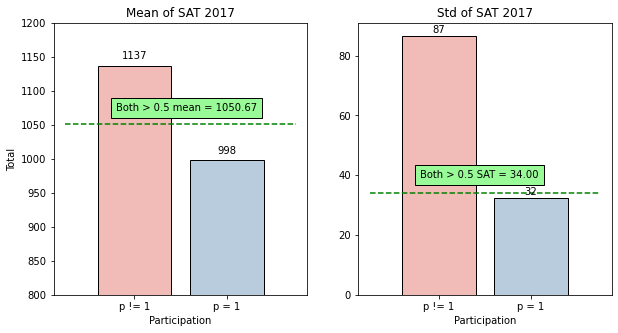

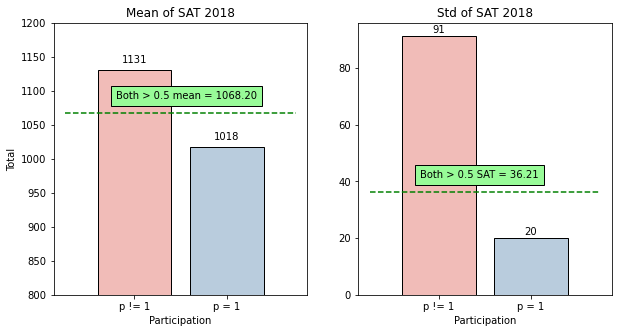

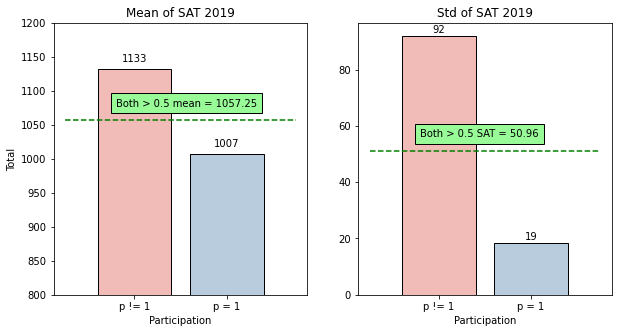

In [59]:
# Mean/std SAT score of the state that both participation > 50%
mean_std_sat_2(act_sat_2017,2017,both_50_2017_T);
mean_std_sat_2(act_sat_2018,2018,both_50_2018_T);
mean_std_sat_2(act_sat_2019,2019,both_50_2019_T);

The student, have both participate rate of ACT and SAT greater than 50%, is above student in SAT 100% participation rate state.

### 4. Relation between score for each subject in ACT/SAT
In this section, we will find the correlation between subject for ACT and SAT. We only analyze each subject for ACT 2017 because the data for each subject for ACT is available only in 2017. For SAT, we can analyze 3 years of the data.

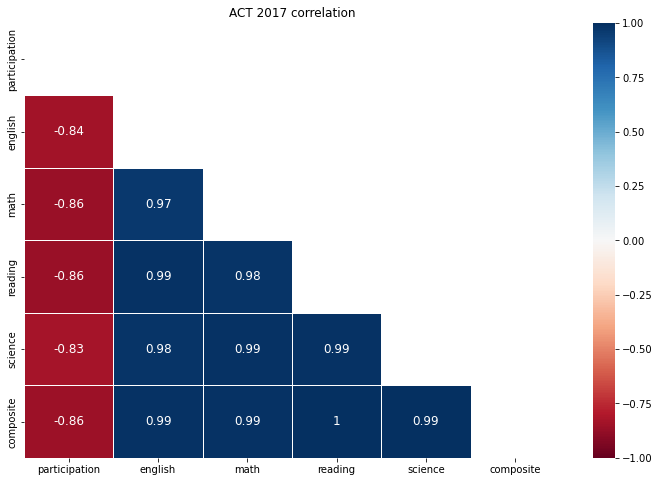

In [60]:
# Correlation of ACT
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(act_2017.corr(), dtype=bool)) # Upper triangle is True
heatmap = sns.heatmap(act_2017.corr(),annot = True,cmap= 'RdBu',mask = mask, \
                      vmin = -1, vmax = 1, linewidths=.5,annot_kws={"fontsize":12});
heatmap.set(title = f'ACT 2017 correlation');

Conclusion from correlation between features in ACT 2017
- Participation rate have high negative correlation with all subject in the test. This means the state with low participation rate will have higher score in all subject.
- The correlation between composite and all subject is almost perfect positive correlation. The students trend to have high score in all subject if they have total high score.
- The correlation between each subject is almost perfect positive correlation. The students trend to have high score in all subject if they have one high score subject.

In [61]:
def heatmap_sat_subject(df,year,ax =None,last = 0):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool)) # Upper triangle is True
    if last == 1 :
        heatmap = sns.heatmap(df.corr(),annot = True,cmap= 'RdBu',mask = mask, \
                    vmin = -1, vmax = 1, linewidths=.5,annot_kws={"fontsize":14},ax= ax);
    else :
        heatmap = sns.heatmap(df.corr(),annot = True,cmap= 'RdBu',mask = mask, \
                    vmin = -1, vmax = 1, linewidths=.5,annot_kws={"fontsize":14},cbar = False,ax= ax);
    heatmap.set(title = f'SAT {year} correlation');

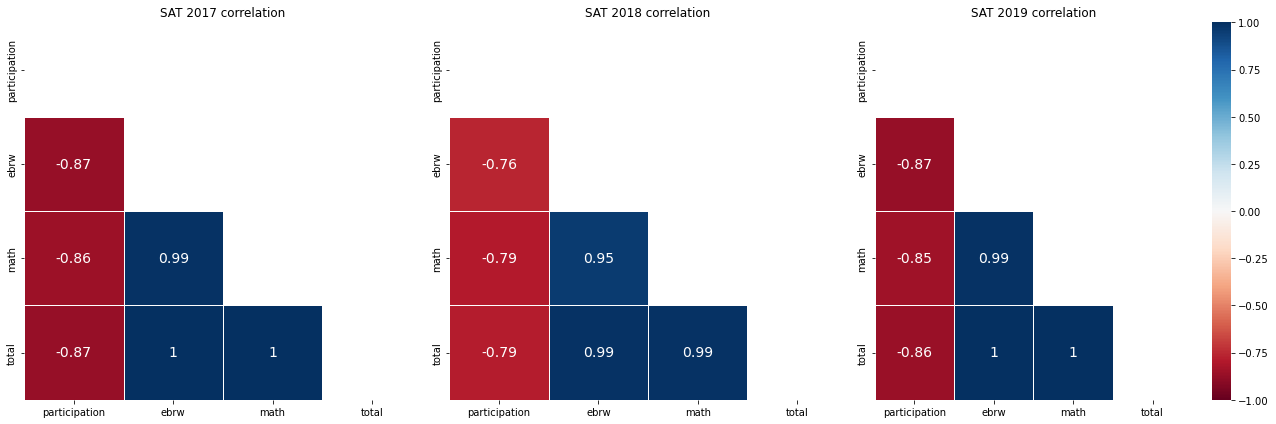

In [62]:
# Correlation of SAT
fig4, ax4 = plt.subplots(ncols = 3,figsize = (18,6))
heatmap_sat_subject(sat_2017,2017,ax = ax4[0])
heatmap_sat_subject(sat_2018,2018,ax = ax4[1])
heatmap_sat_subject(sat_2019,2019,ax = ax4[2],last = 1)
plt.tight_layout()

Conclusion from correlation between features in SAT 2017 - 2019
- The correlation have the same trend as correlation between feature in ACT 2017.
- Participation rate have high negative correlation with all subject in the test. This means the state with low participation rate will have higher score in all subject.
- The correlation between composite and all subject is almost perfect positive correlation. The students trend to have high score in all subject if they have total high score.
- The correlation between each subject is almost perfect positive correlation. The students trend to have high score in all subject if they have one high score subject.

Since both ACT and SAT have the same trend of correlation, there is no difference between ACT and SAT in Math and reading part.

## Conclusions and Recommendations

### Conclusion
1. The state, that have high participation rate either SAT or ACT, trend to have low participation rate for the other test. 
2. For ACT/SAT 2017 - 2019, The state with 100% participation trend to have lower score than other state with lower participation rate.
3. The student in state, that have both participation rate of ACT and SAT greater than 50%, is slightly above student in state that have 100% participation rate .
4. Mean of ACT and SAT doesn't change that much in year 2017 - 2019.
5. Std ACT/SAT score of the student in state, have 100% participation rate, is lower over year.
6. The student that have high score trend to have high score in all subject. 

### Recommendation
1. Recommendations tutor school location
    - From data exploration part1 and part2 : There are [19 states](#19-states-with-100%-ACT-participation-rate-past-3-years) and [4 states](#4-states-with-100%-SAT-participation-rate-past-3-years) that have 100% participation rate of ACT and SAT respectively.
    - From data exploration part3 : There are [5 states](#5-State-both-participation-rate-of-ACT-and-SAT-greater-than-50%) that have both participation rate of ACT and SAT greater than 50%.
2. Recommendations for the next phase
    - If possible : Collecting data in the specific state in the recommend location and analysis the data in the state for more information.
    - Analysis about the state that require ACT/SAT and find more opportunity for locate the tutor school location.